In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
data=pd.read_csv('housing.csv')

In [3]:
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [7]:
x=data[['area']]
y=data['price']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [18]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)


(436, 1) (109, 1)
(436,) (109,)


In [19]:
model=LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [23]:
print("Coefficient:",model.coef_)
print("Intercept:",model.intercept_)

Coefficient: [425.72984194]
Intercept: 2512254.2639593435


In [25]:
y_pred=model.predict(x_test)

In [26]:
for actual,predicted in zip(y_test[:10],y_pred[:10]):
    print(f"Actual:{actual},predicted:{predicted:.2f}")

Actual:4060000,predicted:5024060.33
Actual:6650000,predicted:5279498.24
Actual:3710000,predicted:4232202.83
Actual:6440000,predicted:4640903.47
Actual:2800000,predicted:4198144.44
Actual:4900000,predicted:5373158.80
Actual:5250000,predicted:6139472.52
Actual:4543000,predicted:4636646.18
Actual:2450000,predicted:3891618.95
Actual:3353000,predicted:3661724.84


In [27]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Absolute error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)

Mean Absolute error: 1474748.1337969352
Mean Squared Error: 3675286604768.185
R2 Score: 0.27287851871974644


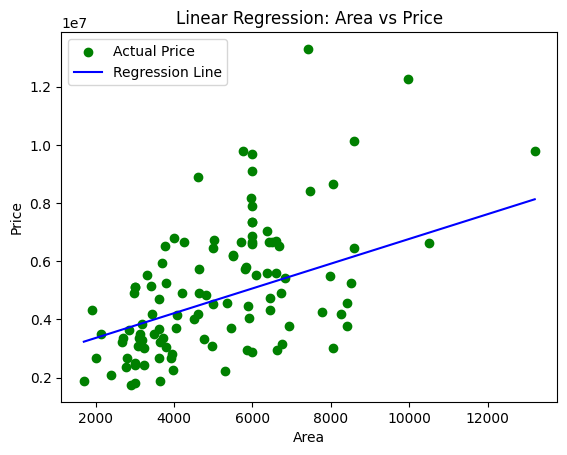

In [34]:
plt.scatter(x_test,y_test,color="green",label="Actual Price")

sorted_indices=x_test['area'].argsort()
plt.plot(
    x_test.iloc[sorted_indices],
    y_pred[sorted_indices],
    color='blue',
    label="Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression: Area vs Price")
plt.legend()
plt.show()

In [36]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [40]:
data_encoded=pd.get_dummies(data,drop_first=True)

X=data_encoded[['area','bedrooms','bathrooms','stories','mainroad_yes','guestroom_yes','basement_yes','parking']]
Y=data_encoded['price']

In [41]:
data_encoded.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [44]:
model=LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

In [46]:
print("Coefficient:",model.coef_)
print("Intercept:",model.intercept_)

Coefficient: [2.74334713e+02 1.04553144e+05 1.11963858e+06 5.60910070e+05
 5.47661406e+05 3.43289149e+05 6.22862385e+05 3.12768577e+05]
Intercept: -402450.41122675873


In [47]:
Y_pred=model.predict(X_test)

In [48]:
for actual, predicted in list(zip(y_test[:10], y_pred[:10])):
    print(f"Actual: {int(actual)}, Predicted: {int(predicted)}")


Actual: 4060000, Predicted: 5024060
Actual: 6650000, Predicted: 5279498
Actual: 3710000, Predicted: 4232202
Actual: 6440000, Predicted: 4640903
Actual: 2800000, Predicted: 4198144
Actual: 4900000, Predicted: 5373158
Actual: 5250000, Predicted: 6139472
Actual: 4543000, Predicted: 4636646
Actual: 2450000, Predicted: 3891618
Actual: 3353000, Predicted: 3661724


In [50]:
MAE=mean_absolute_error(Y_test,Y_pred)
MSE=mean_squared_error(Y_test,Y_pred)
R2=r2_score(Y_test,Y_pred)
print("Mean Absolute error:",MAE)
print("Mean Squared Error:",MSE)
print("R2 Score:",R2)

Mean Absolute error: 1110443.1985217135
Mean Squared Error: 2182877314025.211
R2 Score: 0.5681379014175727


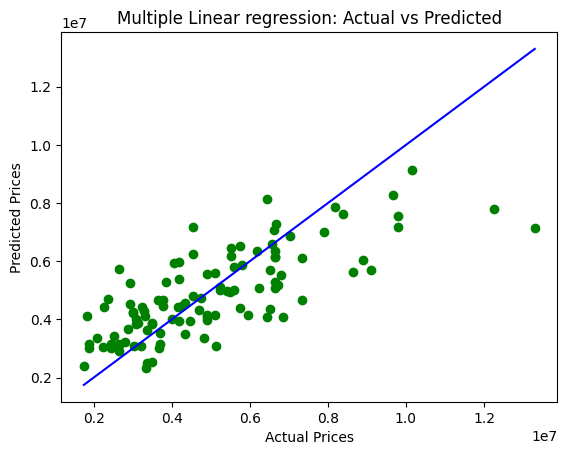

In [51]:
plt.scatter(Y_test,Y_pred, color='green')
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Multiple Linear regression: Actual vs Predicted")
plt.show()